In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
import sys
sys.path.insert(0, os.path.abspath('../environment'))
from env import Exchange

# Two agents trading with first agent drving up the price

Observations: both the agents profit with the one driving up the price profiting more

Text(0, 0.5, 'total portfolio value(cash + stock value)')

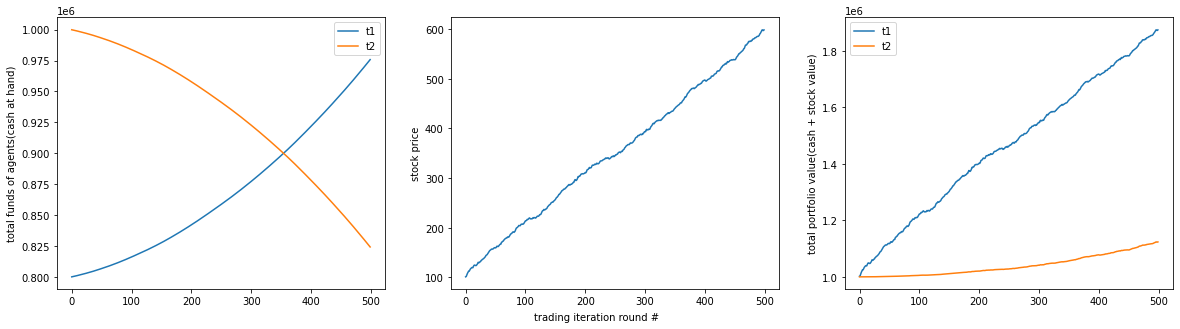

In [4]:
IPO = {"S1": (100, 2000)}  # price, qty
e = Exchange(2, 1000000, IPO)  # 2 agents
e.place_add_order('T1', "S1", buy_sell='buy', qty=2000, price=100) # 1st agent buying
# print(e.stocks['S1'].order_history)

share_price=[]
total_funds=[]
t1_funds=[]
t2_funds=[]
t1_value=[]
t2_value=[]
profit_accrued=0

for i in range(500):
    curr_price= e.stocks['S1']._last_settled_price
    ask_price=curr_price+np.random.normal(loc=1.0, scale=1.0)
    e.place_add_order('T1', "S1", buy_sell='sell', qty=1, price=ask_price) # 1st agent selling
    e.place_add_order('T2', "S1", buy_sell='buy', qty=1, price=ask_price) # 2nd agent buying
    
    # appending histories
    share_price.append(e.stocks['S1']._last_settled_price)
    total_funds.append(e.agents['T1'].total_funds+ e.agents['T2'].total_funds)
    t1_funds.append(e.agents['T1'].total_funds)
    t2_funds.append(e.agents['T2'].total_funds)
    t1_value.append(e.agents['T1'].get_total_portfolio_value())
    t2_value.append(e.agents['T2'].get_total_portfolio_value())

    # print(len(e.stocks['S1'].trade_book))
    profit_accrued+=ask_price

    # bull market where T1 drives up the price and T2 matches the price
fig, ax = plt.subplots(1,3, figsize=(20,5), sharex=True)
# ax[0].plot([i/2 for i in total_funds])
ax[0].plot(t1_funds, label='t1')
ax[0].plot(t2_funds, label='t2')
ax[1].plot(share_price)
ax[2].plot(t1_value, label='t1')
ax[2].plot(t2_value, label='t2')
ax[0].legend()
ax[2].legend()
fig.text(0.5, 0.04, 'trading iteration round #', ha='center')
ax[0].set_ylabel('total funds of agents(cash at hand)')
ax[1].set_ylabel('stock price')
ax[2].set_ylabel('total portfolio value(cash + stock value)')

In [13]:
num_agents=1000
initial_shares=200000

IPO = {"S1": (10, initial_shares)}  # price, qty
e = Exchange(num_agents, 1000000, IPO)  # num_Agents, initial money, IPO
for i in range(1,num_agents+1):
    e.place_add_order('T'+str(i), "S1", buy_sell='buy', qty=initial_shares/num_agents, price=10) # 1st agent buying

share_price=[]
total_funds=[]
t1_funds=[]
t2_funds=[]
t1_value=[]
t2_value=[]

for i in range(70):
    curr_price= e.stocks['S1']._last_settled_price
    next_price=curr_price+np.random.normal(loc=1, scale=1.0)
    agent_num=str(random.randint(1, num_agents))
    e.place_add_order('T'+agent_num, "S1", buy_sell=random.choice(['buy', 'sell']), qty=random.randint(1, 3), price=next_price) # 1st agent buying
#     print('T'+agent_num)
    share_price.append(e.stocks['S1']._last_settled_price)
    total_funds.append(e.agents['T1'].total_funds+ e.agents['T2'].total_funds)
    t1_funds.append(e.agents['T1'].total_funds)
    t2_funds.append(e.agents['T2'].total_funds)
    t1_value.append(e.agents['T1'].get_total_portfolio_value())
    t2_value.append(e.agents['T2'].get_total_portfolio_value())

Text(0, 0.5, 'total portfolio value(cash + stock value)')

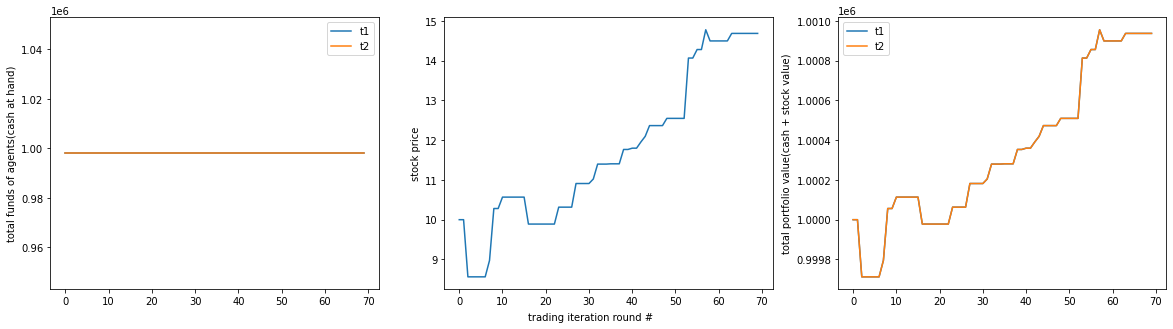

In [14]:
fig, ax = plt.subplots(1,3, figsize=(20,5), sharex=True)
# ax[0].plot([i/2 for i in total_funds])
ax[0].plot(t1_funds, label='t1')
ax[0].plot(t2_funds, label='t2')
ax[1].plot(share_price)
ax[2].plot(t1_value, label='t1')
ax[2].plot(t2_value, label='t2')
ax[0].legend()
ax[2].legend()
fig.text(0.5, 0.04, 'trading iteration round #', ha='center')
ax[0].set_ylabel('total funds of agents(cash at hand)')
ax[1].set_ylabel('stock price')
ax[2].set_ylabel('total portfolio value(cash + stock value)')

In [15]:
e.stocks['S1'].trade_book

[{'resting_order_id': 'T-1_1',
  'resting_timestamp': 4.261544,
  'incoming_order_id': 'T1_1',
  'timestamp': 4.261744,
  'price': 10,
  'quantity': 200.0,
  'side': 'buy'},
 {'resting_order_id': 'T-1_1',
  'resting_timestamp': 4.261544,
  'incoming_order_id': 'T2_1',
  'timestamp': 4.261793,
  'price': 10,
  'quantity': 200.0,
  'side': 'buy'},
 {'resting_order_id': 'T-1_1',
  'resting_timestamp': 4.261544,
  'incoming_order_id': 'T3_1',
  'timestamp': 4.261834,
  'price': 10,
  'quantity': 200.0,
  'side': 'buy'},
 {'resting_order_id': 'T-1_1',
  'resting_timestamp': 4.261544,
  'incoming_order_id': 'T4_1',
  'timestamp': 4.261881,
  'price': 10,
  'quantity': 200.0,
  'side': 'buy'},
 {'resting_order_id': 'T-1_1',
  'resting_timestamp': 4.261544,
  'incoming_order_id': 'T5_1',
  'timestamp': 4.261931,
  'price': 10,
  'quantity': 200.0,
  'side': 'buy'},
 {'resting_order_id': 'T-1_1',
  'resting_timestamp': 4.261544,
  'incoming_order_id': 'T6_1',
  'timestamp': 4.261972,
  'price':